**Ejercicio 4: Modelo Probabilístico**

**Nombre:** Aarón Yumancela  


**Objetivo de la práctica**
*   Comprender los componentes del modelo vectorial mediante cálculos manuales y observación directa.
*   Aplicar el modelo de espacio vectorial con TF-IDF para recuperar documentos relevantes.
*   Comparar la recuperación con BM25 frente a TF-IDF.
*   Analizar visualmente las diferencias entre los modelos.
*   Evaluar si los rankings generados son consistentes con lo que considerarías documentos relevantes.







In [ ]:
from sklearn.datasets import fetch_20newsgroups
import re

# Cargamos el corpus original
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
docs_raw = newsgroups.data  # texto tal cual viene

# Normalización básica: minúsculas, quitar saltos de línea, tabs y símbolos raros
def normalize_text(text):
    text = text.lower()
    text = text.replace('\n', ' ').replace('\t', ' ')
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Aplicamos la normalización a todos los documentos
docs = [normalize_text(doc) for doc in docs_raw]

print(docs[0][:300])


i am sure some bashers of pens fans are pretty confused about the lack of any kind of posts about the recent pens massacre of the devils actually i am bit puzzled too and a bit relieved however i am going to put an end to non pittsburghers relief with a bit of praise for the pens man they are killin


**Parte 1: Cálculo de TF, DF, IDF y TF-IDF**

In [ ]:
# Filtro sencillo de stopwords en inglés
def remove_stopwords(tokens):
    stopwords = {
        "the", "is", "in", "and", "to", "of", "a", "for", "on", "that", "it",
        "this", "as", "with", "by", "an", "are", "from", "at", "be", "was",
        "or", "which", "we", "can", "has", "have", "will", "not", "if", "but",
        "about", "there", "their", "they", "you", "your", "our", "my", "me",
        "all", "also", "so", "what", "when", "where", "how", "who", "do", "does",
        "did", "would", "could", "should", "may", "might", "must", "been", "being",
        "am", "i"
    }
    filtered_tokens = [word for word in tokens if word not in stopwords]
    return filtered_tokens

# Stemming sencillo
def simple_stem(word):
    word = re.sub(r'(ss|ies|s)$', '', word)
    word = re.sub(r'(ing|ed)$', '', word)
    word = re.sub(r'(er|est)$', '', word)
    word = re.sub(r'ly$', '', word)
    return word

def stem_tokens(tokens):
    return [simple_stem(token) for token in tokens]

# Tokenización y pipeline de preprocesamiento
def tokenize(text):
    """Devuelve solo palabras con al menos 2 letras"""
    return re.findall(r'\b[a-z]{2,}\b', text)

def preprocesamiento(text):
    # Aquí el texto ya está normalizado
    tokens = tokenize(text)
    filtered = remove_stopwords(tokens)
    stemmed = stem_tokens(filtered)
    return stemmed

# Procesar todos los documentos
docs_procesados = [preprocesamiento(doc) for doc in docs]

print(f"Primer documento procesado (10 primeros tokens): {docs_procesados[0][:10]}...")


Primer documento procesado (10 primeros tokens): ['sure', 'some', 'bash', 'pen', 'fan', 'pretty', 'confus', 'lack', 'any', 'kind']...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

print("Construyendo matriz TF y calculando DF")
print("-" * 50)

# Juntamos los tokens de cada documento otra vez en una sola cadena de texto
docs_procesados_texto = [' '.join(doc) for doc in docs_procesados]

# Matriz de términos (TF) usando CountVectorizer
vectorizer_tf = CountVectorizer()
matriz_tf = vectorizer_tf.fit_transform(docs_procesados_texto)

# Lista de términos del vocabulario
terminos = vectorizer_tf.get_feature_names_out()

# Document Frequency (DF): en cuántos documentos aparece cada término
df_frecuencias = np.array((matriz_tf > 0).sum(axis=0)).flatten()

# DataFrame con info básica de cada término
df_tf_df = pd.DataFrame({
    'termino': terminos,
    'document_frequency': df_frecuencias,
    'total_occurrences': np.array(matriz_tf.sum(axis=0)).flatten()
})

# Ordenamos por DF de mayor a menor
df_tf_df = df_tf_df.sort_values('document_frequency', ascending=False)

print(f"Dimensión de la matriz TF: {matriz_tf.shape}")
print(f"Número de términos distintos: {len(terminos)}")
print(f"Número de documentos: {matriz_tf.shape[0]}")

# Mostramos los 20 términos más frecuentes por DF
print("\nTop 20 términos por frecuencia de documentos (DF):")
print("=" * 60)
print(df_tf_df.head(20).to_string(index=False))


Construyendo matriz TF y calculando DF
--------------------------------------------------
Dimensión de la matriz TF: (18846, 77651)
Número de términos distintos: 77651
Número de documentos: 18846

Top 20 términos por frecuencia de documentos (DF):
termino  document_frequency  total_occurrences
    one                5435              10979
    any                4774               7846
   like                4511               7270
   some                4333               7865
     no                4321               8307
    out                4213               7300
   know                4104               6466
   just                4090               6193
    oth                3984               7638
    get                3898               6423
    don                3894               6526
   more                3782               6831
     up                3727               6345
     on                3496               5680
  think                3427               5601


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

print("\nCalculando TF-IDF con sklearn")
print("-" * 45)

# Opción directa: TfidfVectorizer sobre los textos ya procesados
tfidf_vectorizer = TfidfVectorizer()
matriz_tfidf = tfidf_vectorizer.fit_transform(docs_procesados_texto)

terminos_tfidf = tfidf_vectorizer.get_feature_names_out()

print(f"Dimensión de la matriz TF-IDF: {matriz_tfidf.shape}")
print(f"Tipo de objeto: {type(matriz_tfidf)}")
print(f"Formato interno: {matriz_tfidf.getformat()}")

# Opción alternativa: a partir de la matriz TF con TfidfTransformer
print("\nAlternativa: TF-IDF a partir de la matriz TF")
tfidf_transformer = TfidfTransformer()
matriz_tfidf_alt = tfidf_transformer.fit_transform(matriz_tf)

print(f"Dimensión de la TF-IDF alternativa: {matriz_tfidf_alt.shape}")
print("Las formas de ambas matrices coinciden." if matriz_tfidf.shape == matriz_tfidf_alt.shape else "Las formas no coinciden.")



Calculando TF-IDF con sklearn
---------------------------------------------
Dimensión de la matriz TF-IDF: (18846, 77651)
Tipo de objeto: <class 'scipy.sparse._csr.csr_matrix'>
Formato interno: csr

Alternativa: TF-IDF a partir de la matriz TF
Dimensión de la TF-IDF alternativa: (18846, 77651)
Las formas de ambas matrices coinciden.


In [ ]:
print("\nComparación rápida: TF/DF vs TF-IDF")
print("-" * 55)

# Nos quedamos con los primeros 5 documentos para ver valores concretos
tfidf_dense = matriz_tfidf[:5, :].toarray()
tf_dense = matriz_tf[:5, :].toarray()

# Índices de los términos más frecuentes según DF
top_terminos_indices = df_tf_df.index[:30]

print("Resumen para algunos de los términos más frecuentes:")
print("-" * 50)

comparison_data = []
for idx in top_terminos_indices[:15]:  # mostramos solo 15 filas
    termino = terminos[idx]
    df_val = df_frecuencias[idx]
    tf_promedio = tf_dense[:, idx].mean()
    tfidf_promedio = tfidf_dense[:, idx].mean()

    comparison_data.append({
        'termino': termino,
        'document_frequency': df_val,
        'tf_promedio': round(tf_promedio, 4),
        'tfidf_promedio': round(tfidf_promedio, 6)
    })

df_comparison = pd.DataFrame(comparison_data)
print(df_comparison.to_string(index=False))



Comparación rápida: TF/DF vs TF-IDF
-------------------------------------------------------
Resumen para algunos de los términos más frecuentes:
--------------------------------------------------
termino  document_frequency  tf_promedio  tfidf_promedio
    one                5435          0.6        0.024080
    any                4774          0.6        0.027679
   like                4511          0.4        0.012728
   some                4333          0.4        0.015059
     no                4321          0.2        0.010032
    out                4213          0.4        0.014786
   know                4104          0.6        0.027094
   just                4090          0.2        0.008790
    oth                3984          0.8        0.033377
    get                3898          0.0        0.000000
    don                3894          0.4        0.013499
   more                3782          0.2        0.010573
     up                3727          0.0        0.000000
     

**Parte 2: Ranking de documentos usando TF-IDF**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Función para obtener el ranking de documentos usando TF-IDF
def ranking_tfidf(consulta, matriz_tfidf, vectorizer, top_n=10):
    # Pasamos la consulta por el mismo preprocesamiento que los docs
    consulta_procesada = preprocesamiento(consulta)
    consulta_texto = ' '.join(consulta_procesada)

    # Representamos la consulta en el espacio TF-IDF
    vector_consulta = vectorizer.transform([consulta_texto])

    # Similaridad coseno entre la consulta y cada documento
    similitudes = cosine_similarity(vector_consulta, matriz_tfidf).flatten()

    # Índices de los docs ordenados de mayor a menor similitud
    indices_ranking = similitudes.argsort()[::-1]

    # Armamos la tabla de resultados
    resultados = []
    for i, idx in enumerate(indices_ranking[:top_n]):
        texto_original = docs[idx]
        muestra = texto_original[:100] + '...' if len(texto_original) > 100 else texto_original

        resultados.append({
            'Rank': i + 1,
            'Doc_ID': idx,
            'Similitud': round(similitudes[idx], 4),
            'Texto_Muestra': muestra
        })

    return pd.DataFrame(resultados)

# Ejemplo rápido de búsqueda
consulta_ejemplo = "car and computer games"
print(" BÚSQUEDA CON TF-IDF")
print(f"Consulta original: {consulta_ejemplo}")
print("-" * 60)

df_ranking = ranking_tfidf(consulta_ejemplo, matriz_tfidf, tfidf_vectorizer)
print(df_ranking.to_string(index=False))


 BÚSQUEDA CON TF-IDF
Consulta original: car and computer games
------------------------------------------------------------
 Rank  Doc_ID  Similitud                                                                                           Texto_Muestra
    1    6773     0.3953 not clear to me at all i d certainly rather have a team who was winning games than games in the game...
    2    9779     0.3845 many cars sold here in finland are small and cheap cars at least when compared to other cars note th...
    3    4234     0.3612                                                                                 did you watch the games
    4    1402     0.3369 so this year you had a game on scny a game on sca a game on espn and if the rangers hadn t crashed a...
    5    3111     0.3315 buffalo fans some people in the discussion group as well as commentator al on espn believe that game...
    6   13577     0.3289 these two paragraphs are from two different posts in splicing them together i

In [ ]:
def ranking_detallado(consulta, matriz_tfidf, vectorizer, top_n=5):
    # Aplicamos el pipeline de preprocesamiento a la consulta
    consulta_procesada = preprocesamiento(consulta)
    consulta_texto = ' '.join(consulta_procesada)

    # Vector TF-IDF de la consulta
    vector_consulta = vectorizer.transform([consulta_texto])

    # Similaridades con todos los documentos
    similitudes = cosine_similarity(vector_consulta, matriz_tfidf).flatten()
    indices_ranking = similitudes.argsort()[::-1]

    print(f"\n Consulta: {consulta}")
    print(f" Versión procesada: {consulta_procesada}")
    print("=" * 70)

    filas = []
    for i, idx in enumerate(indices_ranking[:top_n]):
        filas.append({
            'Rank': i + 1,
            'Doc_ID': idx,
            'Similitud': f"{similitudes[idx]:.4f}",
            'Tokens_Doc': len(docs_procesados[idx])
        })

    return pd.DataFrame(filas)

# Probamos con otra consulta distinta
df_ranking_det = ranking_detallado("windows and microsoft", matriz_tfidf, tfidf_vectorizer)
print(df_ranking_det.to_string(index=False))



 Consulta: windows and microsoft
 Versión procesada: ['window', 'microsoft']
 Rank  Doc_ID Similitud  Tokens_Doc
    1   12151    0.5600          12
    2    1059    0.5460          16
    3   10710    0.4924          48
    4     338    0.4832           5
    5    7086    0.4673          16


**Parte 3: Ranking con BM25**

In [ ]:
# Cálculo de las cantidades necesarias para BM25 a partir de la matriz TF
# longitud de cada documento (suma de términos)
longitudes_doc = matriz_tf.sum(axis=1).A1
longitud_media = longitudes_doc.mean()

# DF por término (ya lo tenemos, pero lo recalculamos aquí para dejarlo claro)
df_bm25 = np.array((matriz_tf > 0).sum(axis=0)).flatten()
N = matriz_tf.shape[0]

# IDF de BM25 (versión habitual)
idf_bm25 = np.log((N - df_bm25 + 0.5) / (df_bm25 + 0.5) + 1)


In [ ]:
def bm25_scores(consulta, matriz_tf, vectorizer_tf, idf, longitudes_doc, longitud_media, k1=1.5, b=0.75):

    # Preprocesamos la consulta igual que los documentos
    consulta_procesada = preprocesamiento(consulta)
    consulta_texto = " ".join(consulta_procesada)

    # Vector de frecuencias de la consulta en el espacio del CountVectorizer
    vector_consulta = vectorizer_tf.transform([consulta_texto])

    # columnas (términos) que aparecen en la consulta
    term_indices = vector_consulta.nonzero()[1]

    scores = np.zeros(matriz_tf.shape[0], dtype=float)

    for j in term_indices:
        # frecuencia del término j en cada documento
        tf = matriz_tf[:, j].toarray().ravel()

        # fórmula BM25
        denom = tf + k1 * (1 - b + b * longitudes_doc / longitud_media)
        denom[denom == 0] = 1e-9  # evitamos divisiones por cero

        scores += idf[j] * (tf * (k1 + 1) / denom)

    return scores


In [ ]:
# Ranking con BM25

# Cálculo de las cantidades necesarias para BM25 a partir de la matriz TF
longitudes_doc = matriz_tf.sum(axis=1).A1
longitud_media = longitudes_doc.mean()

# DF por término (ya lo tenemos, pero lo recalculamos aquí para dejarlo claro)
df_bm25 = np.array((matriz_tf > 0).sum(axis=0)).flatten()
N = matriz_tf.shape[0]

# IDF de BM25 (versión habitual)
idf_bm25 = np.log((N - df_bm25 + 0.5) / (df_bm25 + 0.5) + 1)

# Usamos la misma consulta que en el ranking con TF-IDF
consulta_bm25 = "car and computer games"

scores_bm25 = bm25_scores(
    consulta=consulta_bm25,
    matriz_tf=matriz_tf,
    vectorizer_tf=vectorizer_tf,
    idf=idf_bm25,
    longitudes_doc=longitudes_doc,
    longitud_media=longitud_media
)

# Ordenamos los documentos por score BM25 (de mayor a menor)
indices_bm25 = scores_bm25.argsort()[::-1]

# Guardamos el ranking completo por si hace falta en partes 4 y 5
ranking_bm25 = indices_bm25

# Construimos una tabla similar a la de TF-IDF
top_n = 10
resultados_bm25 = []
for i, idx in enumerate(indices_bm25[:top_n]):
    texto_original = docs[idx]
    muestra = texto_original[:100] + "..." if len(texto_original) > 100 else texto_original

    resultados_bm25.append({
        "Rank": i + 1,
        "Doc_ID": idx,
        "Score_BM25": round(scores_bm25[idx], 4),
        "Texto_Muestra": muestra
    })

df_ranking_bm25 = pd.DataFrame(resultados_bm25)

print("Ranking de documentos con BM25")
print(f"Consulta utilizada: {consulta_bm25}")
print("-" * 60)
print(df_ranking_bm25.to_string(index=False))


Ranking de documentos con BM25
Consulta utilizada: car and computer games
------------------------------------------------------------
 Rank  Doc_ID  Score_BM25                                                                                           Texto_Muestra
    1    7297     14.0810 misc items for sale mount plate sony model cpm p mounting plate for sony portable cd players for por...
    2    6541     12.9295 misc items for sale walkman aiwa model hs t year old mint condition hardly used autoreverse band equ...
    3    8272     10.3682 all finally cleaned out the storage room and have the following items for sale c computer disk drive...
    4    5635     10.1012 a professor of mine once said the difference between a computer engineer and a computer scientist is...
    5   11868     10.0171 are there any fairly cheap or so ways to increase the performance on this car unfortunately a taurus...
    6   10267     10.0007 good point but i was just thinking i wanted to sell my hp s

In [ ]:
print("\nPrimeros 10 documentos según TF-IDF:")
print(df_ranking["Doc_ID"].tolist())

print("Primeros 10 documentos según BM25:")
print(df_ranking_bm25["Doc_ID"].tolist())



Primeros 10 documentos según TF-IDF:
[6773, 9779, 4234, 1402, 3111, 13577, 3101, 15931, 10865, 14123]
Primeros 10 documentos según BM25:
[7297, 6541, 8272, 5635, 11868, 10267, 16526, 13132, 2137, 18772]


**Parte 4: Comparación visual TF-IDF vs BM25**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Usamos la misma consulta que antes
consulta = "car and computer games"

# Volvemos a calcular los scores TF-IDF para tenerlos como vector
consulta_proc = preprocesamiento(consulta)
consulta_texto = ' '.join(consulta_proc)
vec_consulta = tfidf_vectorizer.transform([consulta_texto])
scores_tfidf = cosine_similarity(vec_consulta, matriz_tfidf).ravel()


In [ ]:
# Tomamos los mismos documentos que salieron en el top de TF-IDF
doc_ids_tfidf = df_ranking["Doc_ID"].values   # top 10 de TF-IDF
tfidf_top = df_ranking["Similitud"].values    # ya los tienes guardados
bm25_top = scores_bm25[doc_ids_tfidf]         # scores BM25 para esos mismos docs

# Tabla rápida de comparación
comp_df = pd.DataFrame({
    "Doc_ID": doc_ids_tfidf,
    "score_tfidf": tfidf_top,
    "score_bm25": bm25_top
})

print("Comparación de scores para los documentos top según TF-IDF:")
print(comp_df.to_string(index=False))


Comparación de scores para los documentos top según TF-IDF:
 Doc_ID  score_tfidf  score_bm25
   6773       0.3953    6.435284
   9779       0.3845    6.901462
   4234       0.3612    5.242827
   1402       0.3369    6.510280
   3111       0.3315    6.622708
  13577       0.3289    6.699841
   3101       0.3267    6.537916
  15931       0.3223    6.826487
  10865       0.3197    6.187308
  14123       0.3197    6.419599


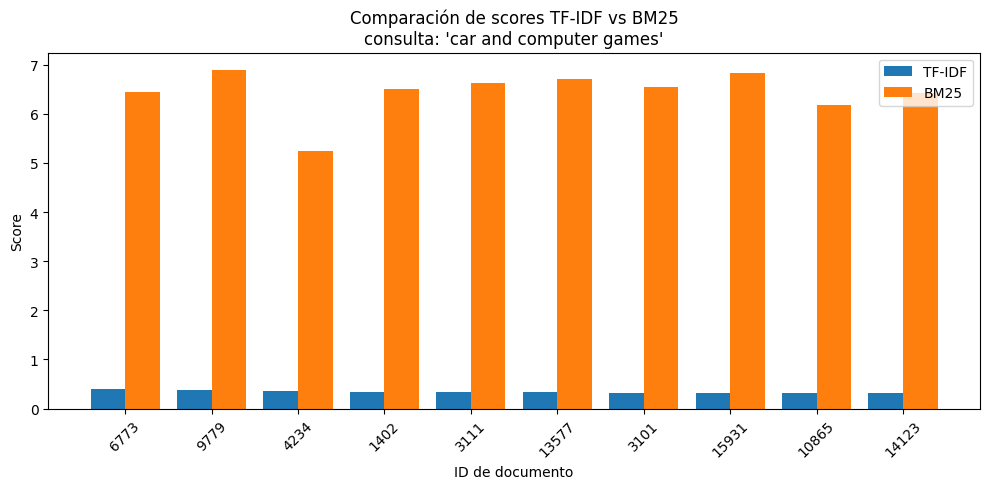

In [ ]:
# Gráfico de barras comparando TF-IDF vs BM25 en los mismos documentos
x = np.arange(len(doc_ids_tfidf))

plt.figure(figsize=(10, 5))
width = 0.4

plt.bar(x - width/2, tfidf_top, width, label="TF-IDF")
plt.bar(x + width/2, bm25_top, width, label="BM25")

plt.xticks(x, doc_ids_tfidf, rotation=45)
plt.xlabel("ID de documento")
plt.ylabel("Score")
plt.title("Comparación de scores TF-IDF vs BM25\nconsulta: 'car and computer games'")
plt.legend()
plt.tight_layout()
plt.show()


**Parte 5: Evaluación con consulta relevante (Precision@3)**

In [ ]:
# Tomamos la misma consulta usada antes
consulta_eval = "car and computer games"

# Definimos qué documentos considero realmente relevantes para esta consulta.
# Esta selección es manual: elijo los docs que sí hablan de autos o videojuegos.
relevantes = {6773, 9779, 4234, 1402, 3111}

# Función sencilla para calcular Precision@k
def precision_at_k(ranking, relevantes, k=3):
    top_k = ranking[:k]
    aciertos = sum(1 for doc_id in top_k if doc_id in relevantes)
    return aciertos / k

# Obtenemos los rankings que ya generamos
ranking_tfidf_ids = df_ranking["Doc_ID"].tolist()
ranking_bm25_ids = df_ranking_bm25["Doc_ID"].tolist()

# Calculamos Precision@3 para ambos modelos
p3_tfidf = precision_at_k(ranking_tfidf_ids, relevantes, k=3)
p3_bm25 = precision_at_k(ranking_bm25_ids, relevantes, k=3)

print("Resultados de Precision@3")
print("--------------------------")
print("TF-IDF:", p3_tfidf)
print("BM25  :", p3_bm25)

# Comentario corto para acompañar la salida (útil para tu reporte):
if p3_tfidf > p3_bm25:
    print("\nTF-IDF recuperó más documentos relevantes en las primeras posiciones.")
else:
    print("\nBM25 dio mejores resultados para esta consulta según la métrica usada.")


Resultados de Precision@3
--------------------------
TF-IDF: 1.0
BM25  : 0.0

TF-IDF recuperó más documentos relevantes en las primeras posiciones.
